# Finite Volume v Finite Difference Methods

Finite difference is not the only way to solve ODEs or PDEs. 

Consider the following hyperbolic PDE:

$\frac{\partial U}{\partial t}+\frac{\partial F}{\partial x}=0$ where $F=F(U)$

This is a 'conservation law'.

For finite difference, recall, we have some discrete grid. We store the value of the function at the grid positions. Then if we want to solve the PDE, we approximate the PDE by using finite differences between the grid points.

However, if we recall, the finite difference scheme is very diffusive. It could not handle the square pulse in the linear advection problem, and the issue is how are we supposed to calculate the derivative at discontinuities?

Finite volume. 

In this case we still discritise our coordinates (e.g. with x). For the finite volume method instead of storing the value of our function at each grid point, we store the __average__ of the function within the grid point.

So instead of storing $U(x_i)$ at grid point $x_i$, we store $<U_i>=\frac{1}{\delta x}\int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}U(x,t_n)dx$

So why is this helpful? This is bc we can devise a method where we don't need to approximate partial derivatives.

consider again

$\frac{\partial U}{\partial t}+\frac{\partial F}{\partial x}=0$

Now consider integrating this function over space and time

$\int_{t_n}^{t_{n+1}}\int_{x-\frac{1}{2}}^{x+\frac{1}{2}}\frac{\partial U}{\partial t}+\frac{\partial F}{\partial x}dtdx=0$

After some algebra we get:

$\delta x (<U>_i^{n+1}-<U>_i^n)+\delta t (\tilde{F}^{n+\frac{1}{2}}_{i+\frac{1}{2}}-\tilde{F}^{n+\frac{1}{2}}_{i-\frac{1}{2}})=0$

What are these squiggly F's? 

$\tilde{F}^{n+\frac{1}{2}}_{i\pm \frac{1}{2}}=\frac{1}{\delta t}\int^{t_{n+1}}_{t_n}F(U(x_{i\pm \frac{1}{2}},t))dt$

so to rearrange finally

$<U>_i^{n+1}=<U>_i^n+\frac{\delta t}{\delta x} (\tilde{F}^{n+\frac{1}{2}}_{i+\frac{1}{2}}-\tilde{F}^{n+\frac{1}{2}}_{i-\frac{1}{2}})=0$

This is a conservative form of the original PDE. Why is this so exciting?

So our solution is saying that the only way to advance our solution is by fluxes (the squiggly F's) into and out of the grid space.

So we've essentially changed the approximation from approximating the derivative to APPROXIMATING THE INTEGRALS (i.e. finding the squiggly F's)

So we get 2 advantages:
1. Guarantee Global Conservation
2. Capture Discontinuities

Consider the Euler Equations.

$\frac{\partial \rho}{\partial t}+\frac{\partial}{\partial x_i}(\rho v_i)=0$

$\frac{\partial}{\partial t}(\rho v_i)+\frac{\partial}{\partial x_j}(\rho v_i v_j + P_{ij})=0$

$\frac{\partial}{\partial t}(\epsilon)+\frac{\partial}{\partial x_i}((\epsilon + P)v_i)=0$

where $\epsilon = e + \frac{1}{2}\rho v^2$

So in 3D we have 5 equations (1 for the mass, 1 for the energy and 3 for the velocity).

But we have 6 variables! ($\rho$,3 of $v_i$, $\epsilon$, $P$).

So we invoke a 'closure relation' (an eqn of state)

$P=(\gamma -1)e$

So what are our conserved variables?

$\begin{pmatrix}\rho \\ \rho v_i \\ \epsilon \end{pmatrix}$ (or the mass density, momenutm density, and energy). So we can recast Euler's equations into what are called __primitive variables__. These are density, velocity and pressure $\begin{pmatrix} \rho \\ v \\ P \end{pmatrix}$, which are variables that are not all conserved. 

Introduce Lagrangian derivative

$\frac{D}{Dt} = \frac{\partial}{\partial t}+\vec{v} \cdot \vec{\nabla}$

So now recasting our Euler equations, we get :


$\frac{D \rho}{Dt}=\rho \vec{\nabla} \cdot \vec{v}$

$\rho \frac{D v_i}{Dt}+\frac{\partial P}{\partial x_i}=0$

$\frac{D e}{Dt}=-(e+P)\vec{\nabla}\cdot\vec{v}$

IF we do this in 1 dimension we get the following equations:

$\frac{\partial \rho}{\partial t}+v_x\frac{\partial \rho}{\partial x}+\rho\frac{\partial v_x}{\partial x}=0$

$\rho \frac{\partial v_x}{\partial t}+\rho v_x\frac{\partial v_x}{\partial x} + \frac{\partial P}{\partial x}=0$

$\frac{\partial P}{\partial t}+v_x\frac{\partial P}{\partial x}+(\gamma P)\frac{\partial v_x}{\partial v_x}{\partial x}$

This is not a conservative formulation. furthermore, all the variables are coupled!

So we can write the equations in a much more elegant form.

$\frac{\partial}{\partial t} \begin{pmatrix} \rho \\ v_x \\ P\end{pmatrix} + \begin{pmatrix} v_x & \rho & 0 \\ 0 & v_x & \frac{1}{\rho} \\ 0 & \gamma P & v_x\end{pmatrix}\frac{\partial}{\partial x} \begin{pmatrix} \rho \\ v_x \\ P \end{pmatrix}=0$

Note that the matrix is NOT a constant (i.e. it is a nonlinear system of partial differential equations), but we can simplify things by making it a constant i.e. by LINEARISING the Euler equations.

To do this we take a trial solution 

$\begin{pmatrix}\rho (x,t) \\ v_x (x,t) \\ P(x,t) \end{pmatrix} = \begin{pmatrix} \rho_0 \\ v_{x0} \\ P_0 \end{pmatrix} + \begin{pmatrix} \rho_1 \\ v_{x1} \\ P_1 \end{pmatrix} e^{i(kx-\omega t)}$

which is sum of a constant initial state and a small fluctuation. We plug this into our primitive Euler equations we keep only the first order terms we get this.

$-i\omega \begin{pmatrix} \rho_1 \\ v_{x1} \\ P_1 \end{pmatrix}+ik\begin{pmatrix} v_{x0} & \rho_0 & 0 \\ 0 & v_{x0} & \frac{1}{\rho_0} \\ 0 & \gamma P_0 & v_{x0} \end{pmatrix} \begin{pmatrix} \rho_1 \\ v_{x1} \\ P_1 \end{pmatrix}=0$



So now the matrix is constant!

Furthermore, this is now an eigenvalue equation!

$A \vec{v} = \lambda \vec{v}$

where $\lambda = \frac{\omega }{k}$

solving the eigenvalue equation gives us three eigenvalues:

first define the sound speed, which is $c_0=\sqrt{\frac{\gamma P_0}{\rho_0}}$

$\lambda_1 = v_{x0}-c_0$

$\lambda_2 = v_{x0}$

$\lambda_3 = v_{x0}+c_0$

Note that the units of the eigenvalues are in speed! In the lectures we sketch a curve, which i will just screenshot here.

(-0.5, 951.5, 373.5, -0.5)

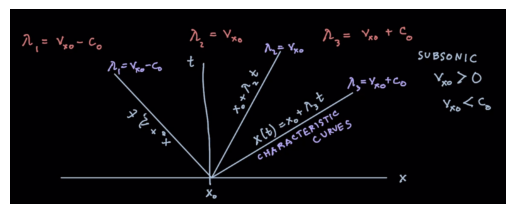

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('Euler_ch.png')
plt.imshow(image)
plt.axis('off')

Now lets solve for the eigenvectors. In this case, it will be useful to solve for both left and right eigenvectors.

So for right eigenvectors we solve this equation:

$A \vec{r_m}=\lambda_m\vec{r_m}$

in this case we get the following eigenvectors:

$\vec{r}_1=\begin{pmatrix}\rho_0 \\ -c_0 \\ \rho_0c_0^2 \end{pmatrix}, \vec{r}_2=\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \vec{r}_3=\begin{pmatrix}\rho_0 \\ c_0 \\ \rho_0c_0^2 \end{pmatrix}$

So let's consider the meaning of these eigenvectors and eigenvalues.

eventually, if we solve for this (looking at the case of the 3rd eigenvalue) we get:

$\rho_1 = \frac{\rho_0 v_{x1}}{c_0}$ and $P_1 = \rho_0 c_0 v_{x1}$ 

in other words, when we have an increase in our $x$ velocity, we get a simultaneous increase in our density and pressure. In other words, this is a right going __compressive wave__. (i.e. a right going sound wave)

With the 1st eigenvector, we get a left going sound wave (also compressive wave).

What about our 2nd eigenvalue?

With this we will get no fluctions in $v_{x1}$ and $P_1$, but we _do_ get fluctuations in $\rho_1$, and this is called an 'entropy wave' (or Contact Discontinuity). 

Now for the left eigenvectors we solve this equation:

$\vec{v}^n A = \vec{v}^n \lambda_n$

We also want the left eigenvectors to be orthogonal ot the right eigenvectors.

It turns out that these are our left eigenvectors:

$\vec{l}^1=\begin{pmatrix} 0 & \frac{-1}{2c_0} & \frac{1}{2\rho_0 c_0^2}\end{pmatrix}$

$\vec{l}^2=\begin{pmatrix}1 & 0 & \frac{-1}{c_0^2}\end{pmatrix}$

$\vec{l}^3=\begin{pmatrix} 0 & \frac{1}{2c_0} & \frac{1}{2\rho_0c_0^2}\end{pmatrix}$

Using these eigenvectors we can build a diagonal matrix.

$\begin{pmatrix}\vec{l}^1 \\ \vec{l}^2 \\ \vec{l}^3 \end{pmatrix} A \begin{pmatrix}\vec{r}_1 & \vec{r}_2 & \vec{r}_3\end{pmatrix} = diag(\lambda_1, \lambda_2, \lambda_3)$